In [3]:
from pickle import load
from glob import glob
fname = '../../../bayes-implicit-cluster-results/elaborate_tree_rjmc_run_n_compounds=481_n_iter=50000_gaussian_ll.pkl'

In [4]:
with open(fname, 'rb') as f:
    result = load(f)

using the following decorators:
bond_specifiers (replace "~" bonds)
	 ['@', '-', '#', '=', ':']
atomic_specifiers (&'d into atom definitions)
	 ['r0', 'r3', 'r4', 'r5', 'r6', 'r7', 'a', 'A', '-1', '+0', '+1', '+2', 'H0', 'H1', 'H2', 'H3', 'H4', 'X1', 'X2', 'X3', 'X4']
bondable_types (~'d onto atoms)
	 ['[#1]', '[#6]', '[#7]', '[#8]', '[#9]', '[#15]', '[#16]', '[#17]', '[#35]', '[#53]', '[(#7,#8,#9,#16,#17,#35)]', '[r0]', '[r3]', '[r4]', '[r5]', '[r6]', '[r7]', '[a]', '[A]', '[-1]', '[+0]', '[+1]', '[+2]', '[H0]', '[H1]', '[H2]', '[H3]', '[H4]', '[X1]', '[X2]', '[X3]', '[X4]']


In [5]:
result.keys()

dict_keys(['traj', 'log_probs', 'log_acceptance_probabilities'])

In [6]:
traj = result['traj']
log_probs = result['log_probs']
log_acceptance_probabilities = result['log_acceptance_probabilities']

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'log probability')

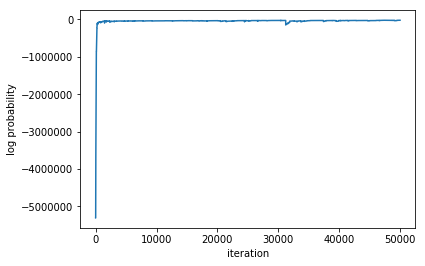

In [8]:
plt.plot(log_probs)
plt.xlabel('iteration')
plt.ylabel('log probability')

Text(0, 0.5, 'log probability')

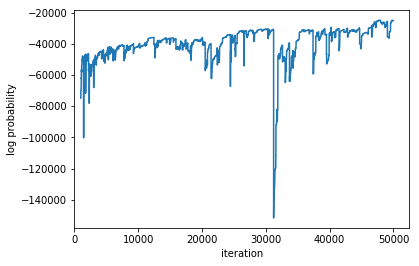

In [9]:
import numpy as np
iterations = np.arange(len(log_probs))
burn_in = 1000
plt.plot(iterations[burn_in:], log_probs[burn_in:])
plt.xlim(0,)
plt.xlabel('iteration')
plt.ylabel('log probability')

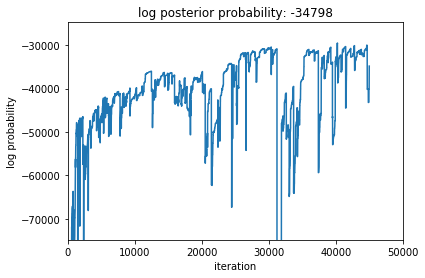

In [11]:
def plot_log_prob(t=1000):
    
    plt.xlim(0, len(log_probs))
    
    #min_t = max(0,t - 500)
    plt.ylim(log_probs[1000], max(log_probs) + np.abs(max(log_probs) * 0.01))
    plt.plot(log_probs[:t])
    plt.xlabel('iteration')
    plt.ylabel('log probability')
    
    plt.title('log posterior probability: {}'.format(int(log_probs[t])))
plot_log_prob(t=45000)

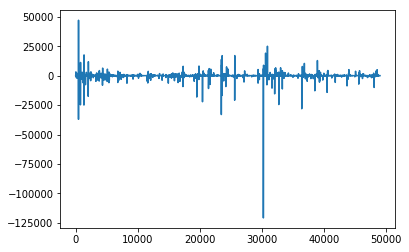

In [10]:
plt.plot(np.diff(log_probs)[burn_in:])

In [12]:
np.sum(np.diff(log_probs)<0)

6208

In [13]:
tree = traj[0]

Text(0.5, 0, 'iteration')

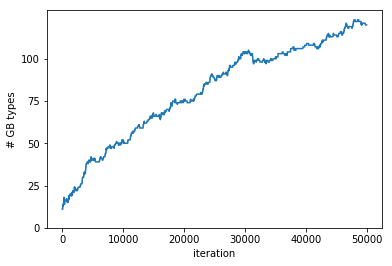

In [16]:
n_types = [tree.number_of_nodes for tree in traj]
plt.plot(n_types)
plt.yticks(list(range(0, max(n_types) + 1))[::25])
plt.ylabel('# GB types')
plt.xlabel('iteration')

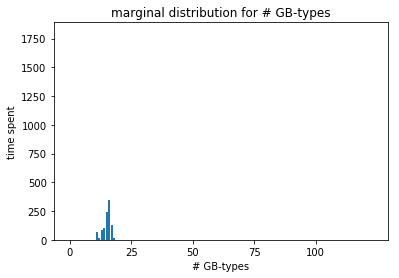

In [249]:
import numpy as np


def plot_running_average_model_evidence(t=1000):
    x = list(range(0, max(n_types) + 1))
    y = np.bincount(n_types[:t], minlength=len(x))
    
    plt.bar(x, y)
    plt.xlabel('# GB-types')
    plt.ylabel('time spent')
    plt.title('marginal distribution for # GB-types')
    
    plt.xticks(list(range(max(n_types) + 1))[::25])
    
    plt.ylim(0,max(np.bincount(n_types)))
plot_running_average_model_evidence()

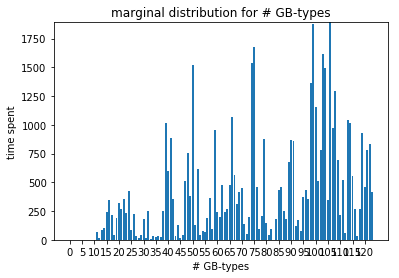

In [18]:
plot_running_average_model_evidence(len(traj))

In [19]:
tree = traj[-1]

In [20]:
from simtk import unit

radii = np.array([tree.get_radius(n) / unit.nanometer for n in tree.ordered_nodes])

In [21]:
list(zip(tree.ordered_nodes, radii))

[('*', 0.17699446267496224),
 ('[#1]', 0.20104508115345396),
 ('[#6]', 0.13389086947848472),
 ('[#7]', 0.2722937750347376),
 ('[#8]', 0.20303445399985),
 ('[#9]', 0.16177135367118092),
 ('[#15]', 0.10763262072074484),
 ('[#16]', 0.13912188409559884),
 ('[#17]', 0.10667312158922643),
 ('[#35]', 0.14119870815669244),
 ('[#53]', 0.14998135490426093),
 ('[#6&H0]', 0.20757150465345084),
 ('[#6&X2]', 0.1760778020143105),
 ('[#6&H2]', 0.14011163817895286),
 ('[#6&H4]', 0.058694994004184986),
 ('[#6]~[+1]', 0.07718464190835099),
 ('[#6&r5]', 0.08523997261295119),
 ('[#6]~[#16]', 0.05596505182081503),
 ('[#6&r3]', 0.09261690658253692),
 ('[#7&H1]', 0.22962351177761864),
 ('[#7&H3]', 0.3384718197012069),
 ('[#7&X4]', 0.2634187680992212),
 ('[#7]~[#16]', 0.050203166406623104),
 ('[#7&X2]', 0.2217579326065969),
 ('[#7]~[-1]', 0.3625175089649786),
 ('[#7&r4]', 0.1742686430703821),
 ('[#8&r3]', 0.05128851048406614),
 ('[#8&r6]', 0.20547834856763206),
 ('[#8]~[r0]', 0.1554600517466846),
 ('[#8&r7]', 

In [18]:
# to assign colors, let's get all of the types every encountered during the simulation
# then put them in lexicographic order, then make a dictionary that indexes into a nice seaborn color palette

In [22]:
all_types = set()
for tree in traj:
    all_types.update(list(tree.G.nodes()))
all_types = sorted(list(all_types))

In [23]:
all_types

['*',
 '[#15]',
 '[#15]~[#6]',
 '[#15]~[H1]',
 '[#15]~[X4]',
 '[#16&+2]',
 '[#16&-1]',
 '[#16&H1]',
 '[#16&H2]',
 '[#16&X3]',
 '[#16&X3]~[#6]',
 '[#16&X3]~[X4]',
 '[#16&X4&r5]',
 '[#16&X4]',
 '[#16&X4]~[#17]',
 '[#16&X4]~[a]',
 '[#16&a]',
 '[#16]',
 '[#16]~[#16]',
 '[#16]~[#16]~[H2]',
 '[#16]~[#7]',
 '[#16]~[#8]',
 '[#16]~[r7]',
 '[#17]',
 '[#17]~[#16]',
 '[#17]~[H1]',
 '[#17]~[H3]',
 '[#17]~[X3]',
 '[#17]~[X4]',
 '[#17]~[r0]',
 '[#1]',
 '[#1]~[X3]',
 '[#1]~[a]',
 '[#1]~[r4]',
 '[#1]~[r7]',
 '[#35]',
 '[#35]~[A]~[X3]',
 '[#35]~[H1]',
 '[#35]~[H1]~[#35]',
 '[#35]~[H2]',
 '[#35]~[H2]~[H1]',
 '[#35]~[H2]~[X4]',
 '[#35]~[H3]',
 '[#35]~[X3]',
 '[#35]~[X4]~[H1]',
 '[#35]~[r0]~[H1]',
 '[#53]',
 '[#53]~[A&H2]',
 '[#53]~[A&H2]~[#6]',
 '[#53]~[A]',
 '[#53]~[A]~[H2]',
 '[#53]~[H2]~[H3]~[A]',
 '[#53]~[H2]~[X4]~[H3]~[A]',
 '[#53]~[H3]~[A]',
 '[#53]~[X3]',
 '[#53]~[r0]',
 '[#6&H0&A]~[H2]',
 '[#6&H0&X4]@[H2&r6]',
 '[#6&H0&X4]~[a]~[r6]~[H2]',
 '[#6&H0&a]~[#17]',
 '[#6&H0&r5]~[H2]',
 '[#6&H0]',
 '[#6&H

In [24]:
len(all_types)

242

In [25]:
import seaborn.apionly as sns
color_list = sns.color_palette(palette="husl", n_colors=len(all_types))
color_list = color_list[5:] + color_list[:5]
color_dict = dict(zip(all_types, color_list))

/Users/joshuafass/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/joshuafass/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [26]:
print(traj[0])
print(traj[-1])

*          (r = 0.1 nm)
|-[#1]     (r = 0.1 nm)
|-[#6]     (r = 0.1 nm)
|-[#7]     (r = 0.1 nm)
|-[#8]     (r = 0.1 nm)
|-[#9]     (r = 0.1 nm)
|-[#15]    (r = 0.1 nm)
|-[#16]    (r = 0.1 nm)
|-[#17]    (r = 0.1 nm)
|-[#35]    (r = 0.1 nm)
|-[#53]    (r = 0.1 nm)
*                                             (r = 0.176 nm)
|-[#1]                                        (r = 0.201 nm)
|-[#6]                                        (r = 0.133 nm)
  |-[#6&H0]                                   (r = 0.207 nm)
    |-[#6&H0]~[H2]                            (r = 0.226 nm)
      |-[#6&H0]@[H2]                          (r = 0.136 nm)
        |-[#6&H0]~[A]@[H2]                    (r = 0.063 nm)
          |-[#6&H0]~[A]@[H2&r3]               (r = 0.222 nm)
          |-[#6&H0]=[A]@[H2]                  (r = 0.140 nm)
            |-[#6&H0]=[A]~[A]@[H2]            (r = 0.066 nm)
              |-[#6&H0]=[A]~[A&X4]@[H2]       (r = 0.198 nm)
          |-[#6&H0]~[H2]~[A]@[H2]             (r = 0.350 nm)
    

In [27]:
# for line-plot representation
x = np.arange(len(traj))
ys = [np.zeros(len(traj)) * np.nan for _ in all_types]
c = [color_dict[t] for t in all_types]

type_dict = dict(zip(all_types, range(len(all_types))))

for time, tree in enumerate(traj):
    for n in tree.ordered_nodes:
        i = type_dict[n]
        ys[i][time] = tree.get_radius(n) / unit.nanometer

In [28]:
ys[0] - ys[1]

array([0.        , 0.        , 0.        , ..., 0.06936184, 0.06936184,
       0.06936184])

In [29]:
tree.ordered_nodes

['*',
 '[#1]',
 '[#6]',
 '[#7]',
 '[#8]',
 '[#9]',
 '[#15]',
 '[#16]',
 '[#17]',
 '[#35]',
 '[#53]',
 '[#6&H0]',
 '[#6&X2]',
 '[#6&H2]',
 '[#6&H4]',
 '[#6]~[+1]',
 '[#6&r5]',
 '[#6]~[#16]',
 '[#6&r3]',
 '[#7&H1]',
 '[#7&H3]',
 '[#7&X4]',
 '[#7]~[#16]',
 '[#7&X2]',
 '[#7]~[-1]',
 '[#7&r4]',
 '[#8&r3]',
 '[#8&r6]',
 '[#8]~[r0]',
 '[#8&r7]',
 '[#9]~[r0]',
 '[#9]~[H2]',
 '[#16&-1]',
 '[#16&a]',
 '[#16&H1]',
 '[#16&X4]',
 '[#16&X3]',
 '[#17]~[H3]',
 '[#35]~[H1]',
 '[#53]~[A]',
 '[#6&H0]~[H2]',
 '[#6&H0]~[#17]',
 '[#6&X2]~[H0]',
 '[#6&X2&H1]',
 '[#6&H2&r4]',
 '[#6&H2]~[#7]',
 '[#6&H2&r5]',
 '[#6&H2]~[r7]',
 '[#6&H2]~[r6]',
 '[#6&H2&X3]',
 '[#6]~[+1&r6]',
 '[#6&r5&a]',
 '[#6]~[#16&X2]',
 '[#7&H1&A]',
 '[#7&H1&r5]',
 '[#7&X4]~[r6]',
 '[#7&X4&H1]',
 '[#7]~[a]~[#16]',
 '[#7&X2]~[#8]',
 '[#8]~[r0&+1]',
 '[#8]~[r0]~[#17]',
 '[#9]~[r0&H3]',
 '[#9]~[r0&H1]',
 '[#16&X4&r5]',
 '[#16&X4]~[a]',
 '[#16&X3]~[#6]',
 '[#35]~[H2]~[H1]',
 '[#35]~[H1]~[#35]',
 '[#53]~[A&H2]',
 '[#53]~[H3]~[A]',
 '[#6&H0]@[H2]'

In [30]:
tree.get_radius('*'), tree.get_radius('[#1]')

(Quantity(value=0.17699446267496224, unit=nanometer),
 Quantity(value=0.20104508115345396, unit=nanometer))

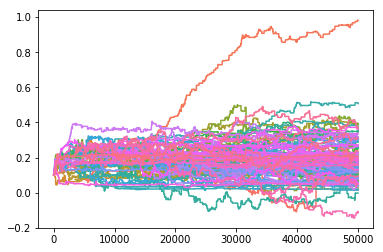

In [31]:
for i in range(1, len(all_types)):
    plt.plot(x, ys[i], c=c[i])

In [32]:
for y, n in zip(ys, all_types):
    if np.min(np.nan_to_num(y)) < 0:
        print(n)

*
[#15]~[H1]
[#6&H2&r4]
[#9]~[+0]~[X2]~[r0&H3]
[#9]~[+0]~[r0&H3]


In [33]:
[(n, np.min(np.nan_to_num(y))) for (n, y) in zip(all_types, ys) if np.min(np.nan_to_num(y)) <= 0]

[('*', -0.07946902522239321),
 ('[#15]~[#6]', 0.0),
 ('[#15]~[H1]', -0.10867458494066852),
 ('[#15]~[X4]', 0.0),
 ('[#16&+2]', 0.0),
 ('[#16&-1]', 0.0),
 ('[#16&H1]', 0.0),
 ('[#16&H2]', 0.0),
 ('[#16&X3]', 0.0),
 ('[#16&X3]~[#6]', 0.0),
 ('[#16&X3]~[X4]', 0.0),
 ('[#16&X4&r5]', 0.0),
 ('[#16&X4]', 0.0),
 ('[#16&X4]~[#17]', 0.0),
 ('[#16&X4]~[a]', 0.0),
 ('[#16&a]', 0.0),
 ('[#16]~[#16]', 0.0),
 ('[#16]~[#16]~[H2]', 0.0),
 ('[#16]~[#7]', 0.0),
 ('[#16]~[#8]', 0.0),
 ('[#16]~[r7]', 0.0),
 ('[#17]~[#16]', 0.0),
 ('[#17]~[H1]', 0.0),
 ('[#17]~[H3]', 0.0),
 ('[#17]~[X3]', 0.0),
 ('[#17]~[X4]', 0.0),
 ('[#17]~[r0]', 0.0),
 ('[#1]~[X3]', 0.0),
 ('[#1]~[a]', 0.0),
 ('[#1]~[r4]', 0.0),
 ('[#1]~[r7]', 0.0),
 ('[#35]~[A]~[X3]', 0.0),
 ('[#35]~[H1]', 0.0),
 ('[#35]~[H1]~[#35]', 0.0),
 ('[#35]~[H2]', 0.0),
 ('[#35]~[H2]~[H1]', 0.0),
 ('[#35]~[H2]~[X4]', 0.0),
 ('[#35]~[H3]', 0.0),
 ('[#35]~[X3]', 0.0),
 ('[#35]~[X4]~[H1]', 0.0),
 ('[#35]~[r0]~[H1]', 0.0),
 ('[#53]~[A&H2]', 0.0),
 ('[#53]~[A&H2]~[#

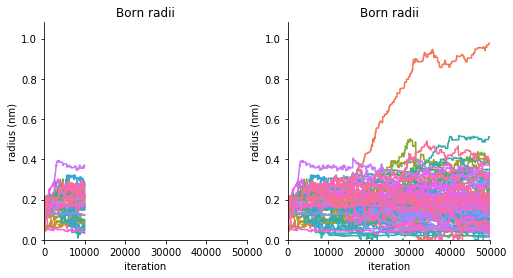

In [34]:
def plot_radii(ax, up_to_iteration=1000):
    
    for i in range(1, len(all_types)): # skip wildcard type
        ax.plot(x[:up_to_iteration], ys[i][:up_to_iteration], c=c[i])
    ax.set_xlim(0, len(traj))
    ax.set_ylim(0, np.max(np.nan_to_num(ys)) * 1.1)
    ax.set_xlabel('iteration')
    ax.set_ylabel('radius (nm)')
    
    ax.set_title('Born radii')

def prettify_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plot_radii(ax, 10000)
prettify_axes(ax)

ax = plt.subplot(1,2,2)
plot_radii(ax, len(traj))
prettify_axes(ax)

In [105]:
len(x), len(ys[1]), len(traj)

(15001, 15001, 15001)

In [106]:
ys[0]

array([0.1, 0.1, 0.1, ..., nan, nan, nan])

In [62]:
np.max(np.nan_to_num(ys))

0.4091350306374333

In [52]:
from tqdm import tqdm

t_s = range(2, len(traj))[::100]

In [53]:
len(t_s)

500

In [54]:
import mdtraj as md
import numpy as np
from pkg_resources import resource_filename
from tqdm import tqdm

from bayes_implicit_solvent.posterior_sampling import Molecule
from bayes_implicit_solvent.smarts import atomic_number_dict
from bayes_implicit_solvent.solvation_free_energy import smiles_list
from bayes_implicit_solvent.typers import GBTypingTree
from bayes_implicit_solvent.utils import mdtraj_to_list_of_unitted_snapshots

data_path = '../data/'

np.random.seed(0)
train_mols = []

N_train = 481

smiles_subset = list(smiles_list)
np.random.shuffle(smiles_subset)
train_smiles_subset = smiles_subset[:N_train]
print('looking at only {} entries from FreeSolv'.format(len(train_smiles_subset)))
n_configuration_samples = 10

for smiles in train_smiles_subset:
    mol = Molecule(smiles, vacuum_samples=[])
    path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                               'vacuum_samples/vacuum_samples_{}.h5'.format(
                                                   mol.mol_index_in_smiles_list))
    vacuum_traj = md.load(path_to_vacuum_samples)
    thinning = int(len(vacuum_traj) / n_configuration_samples)
    mol.vacuum_traj = mdtraj_to_list_of_unitted_snapshots(vacuum_traj[::thinning])
    #print('thinned vacuum_traj from {} to {}'.format(len(vacuum_traj), len(mol.vacuum_traj)))
    train_mols.append(mol)

looking at only 481 entries from FreeSolv


In [55]:
test_smiles_subset = smiles_subset[N_train:]
test_mols = []
for smiles in test_smiles_subset:
    mol = Molecule(smiles, vacuum_samples=[])
    path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                               'vacuum_samples/vacuum_samples_{}.h5'.format(
                                                   mol.mol_index_in_smiles_list))
    vacuum_traj = md.load(path_to_vacuum_samples)
    thinning = int(len(vacuum_traj) / n_configuration_samples)
    mol.vacuum_traj = mdtraj_to_list_of_unitted_snapshots(vacuum_traj[::thinning])
    #print('thinned vacuum_traj from {} to {}'.format(len(vacuum_traj), len(mol.vacuum_traj)))
    test_mols.append(mol)

In [56]:
experiment_train = [mol.experimental_value for mol in train_mols]
experiment_unc_train = [mol.experimental_uncertainty for mol in train_mols]

In [57]:
experiment_test = [mol.experimental_value for mol in test_mols]
experiment_unc_test = [mol.experimental_uncertainty for mol in test_mols]

In [58]:
def get_train_predictions(tree):
    return [mol.predict_solvation_free_energy(tree.assign_radii(mol.mol)) for mol in train_mols]
def get_test_predictions(tree):
    return [mol.predict_solvation_free_energy(tree.assign_radii(mol.mol)) for mol in test_mols]

In [59]:
train_predictions = []
for t in tqdm(t_s):
    tree = traj[t]
    tree.update_node_order()
    train_predictions.append(get_train_predictions(tree))

100%|██████████| 500/500 [24:22<00:00,  2.92s/it]


In [60]:
test_predictions = []
for t in tqdm(t_s):
    tree = traj[t]
    test_predictions.append(get_test_predictions(tree))

 36%|███▌      | 178/500 [02:20<04:14,  1.26it/s]/Users/joshuafass/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
100%|██████████| 500/500 [08:18<00:00,  1.00it/s]


In [61]:
y_ = [[p[0] for p in pred] for pred in train_predictions]
y_unc = [[p[1] for p in pred] for pred in train_predictions]

In [62]:
y_test = [[p[0] for p in pred] for pred in test_predictions]
y_unc_test = [[p[1] for p in pred] for pred in test_predictions]

Text(0, 0.5, 'prediction')

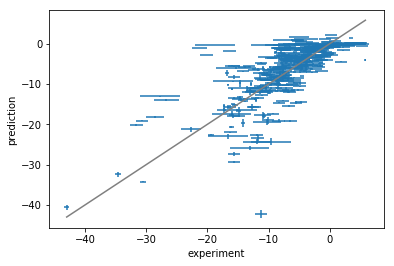

In [63]:
plt.errorbar(x=experiment_train, xerr=experiment_unc_train, y=y_[-1], yerr=y_unc[-1], fmt='none')

plt.plot(sorted(experiment_train), sorted(experiment_train), color='grey')

plt.xlabel('experiment')
plt.ylabel('prediction')

Text(0, 0.5, 'prediction')

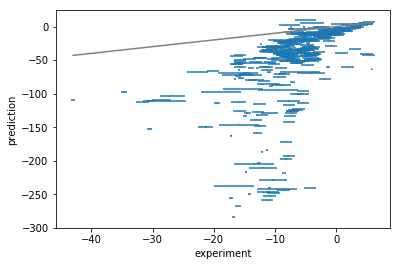

In [64]:
plt.errorbar(x=experiment_train, xerr=experiment_unc_train, y=y_[0], yerr=y_unc[0], fmt='none')

plt.plot(sorted(experiment_train), sorted(experiment_train), color='grey')

plt.xlabel('experiment')
plt.ylabel('prediction')

In [83]:
def skip_rows_with_nans(preds, warn=False):
    finite = (np.isnan(preds).sum(1) == 0)
    if warn and (np.sum(finite) < len(preds)):
        print('skipping {} of {} rows'.format((len(preds) - np.sum(finite)), len(preds)))
    return preds[finite]

def coverage(preds, actual, prob=0.99):
    percentile = prob * 100
    
    eps = (100.0 - percentile) / 2
    lb, ub = np.percentile(skip_rows_with_nans(preds), q=[eps, 100.0 - eps], axis=0)
    return np.mean((actual >= lb) * (actual <= ub))

In [84]:
np.array(y_test).shape

(500, 161)

In [141]:
ps = np.linspace(0, 1.0, 5000)
test_coverage = np.array(list(map(lambda p: coverage(np.array(y_test), experiment_test, p), ps)))

train_coverage = np.array(list(map(lambda p: coverage(np.array(y_), experiment_train, p), ps)))

In [142]:
from bayes_implicit_solvent.utils import remove_top_right_spines

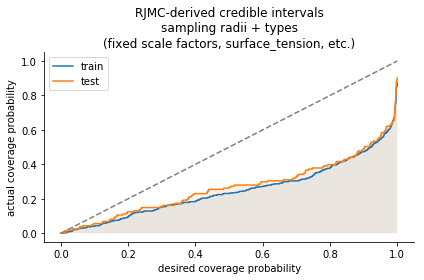

In [143]:
ax = plt.subplot(1,1,1)

plt.plot(ps, train_coverage, label='train')
plt.fill_between(ps, train_coverage, alpha=0.1)

plt.plot(ps, test_coverage, label='test')
plt.fill_between(ps, test_coverage, alpha=0.1)

plt.legend()

plt.plot(ps, ps, '--', color='grey')
plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')
remove_top_right_spines(ax)

plt.title('RJMC-derived credible intervals\nsampling radii + types\n(fixed scale factors, surface_tension, etc.)')

plt.tight_layout()
plt.savefig('rjmc-qq-plot-thingy.png', dpi=300, bbox_inches='tight')

In [144]:
np.trapz(train_coverage, ps)

0.24765431256729514

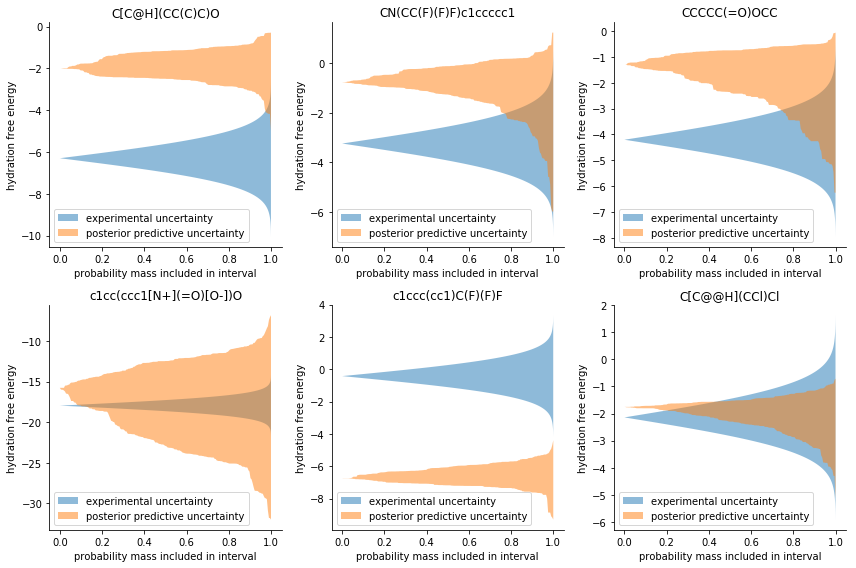

In [145]:
# maybe a better thing is to say how much of the experimental uncertainty is in a certain interval?

# or maybe just check if the intervals overlap?
ind = 0
from scipy.stats import norm
plt.figure(figsize=(12,8))

preds = skip_rows_with_nans(np.array(y_test)[50:])

percentile = ps * 100
eps = (100.0 - percentile) / 2
lb_percentile = eps
ub_percentile = 100.0 - eps

lb_pred = np.percentile(preds, q=lb_percentile, axis=0)
ub_pred = np.percentile(preds, q=ub_percentile, axis=0)
for ind in range(6):
    ax = plt.subplot(2,3,ind + 1)
    lb_, ub_ = norm.interval(alpha=ps, loc=experiment_test[ind], scale=experiment_unc_test[ind])
    plt.fill_between(ps, ub_, lb_, alpha=0.5, label='experimental uncertainty')
    plt.fill_between(ps, ub_pred[:,ind], lb_pred[:,ind], alpha=0.5, label='posterior predictive uncertainty')

    plt.legend(loc='lower left')
    plt.xlabel('probability mass included in interval')
    plt.ylabel('hydration free energy')

    plt.title(test_mols[ind].smiles)

    remove_top_right_spines(ax)
    
plt.tight_layout()

plt.savefig('some_example_experimental_vs_posterior_predictive_uncertainties.png', dpi=300)

In [146]:
def overlap_of_intervals(A_low, A_high, B_low, B_high):
    argsorted = np.argsort(np.vstack([A_low, A_high, B_low, B_high]), 0)
    interval_overlap = np.array([tuple(s) != (0,1) and tuple(s) != (2,3) for s in np.sort(argsorted[:2], axis=0).T])
    return interval_overlap

In [147]:
overlaps = []
for i in range(len(experiment_test)):
    lb_, ub_ = norm.interval(alpha=ps, loc=experiment_test[i], scale=experiment_unc_test[i])
    overlaps.append(overlap_of_intervals(lb_, ub_, lb_pred[:,i], ub_pred[:,i]))

overlaps = np.array(overlaps)
overlaps.shape

(161, 5000)

In [148]:
test_coverage = np.array(list(map(lambda p: coverage(preds, experiment_test, p), ps)))
train_coverage = np.array(list(map(lambda p: coverage(np.array(y_)[:len(preds)], experiment_train, p), ps)))

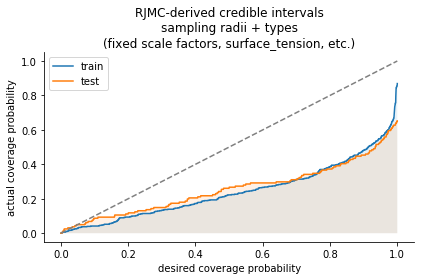

In [149]:
ax = plt.subplot(1,1,1)

plt.plot(ps, train_coverage, label='train')
plt.fill_between(ps, train_coverage, alpha=0.1)

plt.plot(ps, test_coverage, label='test')
plt.fill_between(ps, test_coverage, alpha=0.1)

plt.legend()

plt.plot(ps, ps, '--', color='grey')
plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')
remove_top_right_spines(ax)

plt.title('RJMC-derived credible intervals\nsampling radii + types\n(fixed scale factors, surface_tension, etc.)')

plt.tight_layout()
plt.savefig('rjmc-qq-plot-thingy.png', dpi=300, bbox_inches='tight')

In [150]:
interval_overlap = overlaps.mean(0)

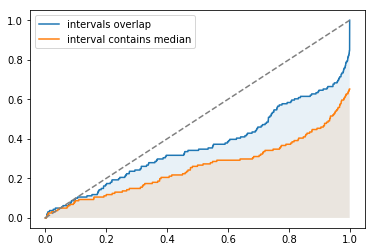

In [151]:
plt.plot(ps, interval_overlap, label='intervals overlap')
plt.fill_between(ps, interval_overlap, alpha=0.1)
plt.plot(ps, test_coverage, label='interval contains median')
plt.fill_between(ps, test_coverage, alpha=0.1)
plt.plot(ps, ps, '--', color='grey')
plt.legend()

In [153]:
# I think the correct thing to do is instead ask how much probability mass from the experiment is included in our interval

interval_masses = []
for i in range(len(experiment_test)):
    
    experiment_cdf_at_ub = norm.cdf(ub_pred[:,i], loc=experiment_test[i], scale=experiment_unc_test[i])
    experiment_cdf_at_lb = norm.cdf(lb_pred[:,i], loc=experiment_test[i], scale=experiment_unc_test[i])
    
    mass_in_interval = experiment_cdf_at_ub - experiment_cdf_at_lb

    interval_masses.append(mass_in_interval)


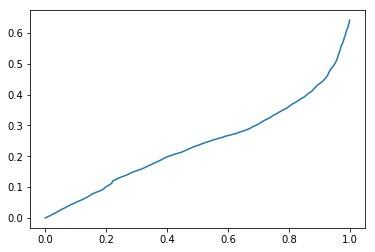

In [154]:
plt.plot(ps, np.mean(interval_masses, 0))

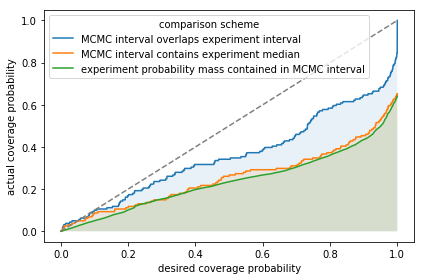

In [155]:
plt.plot(ps, interval_overlap, label='MCMC interval overlaps experiment interval')
plt.fill_between(ps, interval_overlap, alpha=0.1)


plt.plot(ps, test_coverage, label='MCMC interval contains experiment median')
plt.fill_between(ps, test_coverage, alpha=0.1)

plt.plot(ps, np.mean(interval_masses, 0), label='experiment probability mass contained in MCMC interval')
plt.fill_between(ps, np.mean(interval_masses, 0), alpha=0.1)


plt.plot(ps, ps, '--', color='grey')
plt.legend(title='comparison scheme')

plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')
remove_top_right_spines(ax)

plt.tight_layout()
plt.savefig('schemes-for-comparing-experiment-and-posterior.png', dpi=300, bbox_inches='tight')

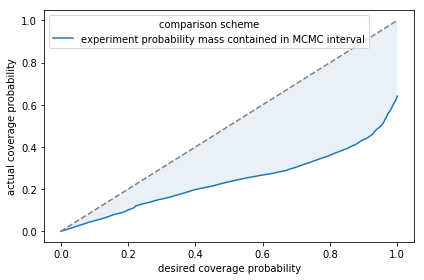

In [159]:
#plt.plot(ps, interval_overlap, label='MCMC interval overlaps experiment interval')
#plt.fill_between(ps, interval_overlap, alpha=0.1)


#plt.plot(ps, test_coverage, label='MCMC interval contains experiment median')
#plt.fill_between(ps, test_coverage, alpha=0.1)

plt.plot(ps, np.mean(interval_masses, 0), label='experiment probability mass contained in MCMC interval')
plt.fill_between(ps, np.mean(interval_masses, 0), ps, alpha=0.1)


plt.plot(ps, ps, '--', color='grey')
plt.legend(title='comparison scheme')

plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')
remove_top_right_spines(ax)

plt.tight_layout()
plt.savefig('schemes-for-comparing-experiment-and-posterior.png', dpi=300, bbox_inches='tight')

In [176]:
# woops, I also need to include the prediction uncertainties...

In [217]:
ind = 1
burn_in = 10

In [218]:

pred_means.shape, pred_uncs.shape

((490,), (490,))

(array([ 2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,
         0.,  5.,  1.,  2.,  1.,  1.,  1.,  5.,  4.,  6.,  2.,  4., 18.,
         2.,  6.,  0.,  7., 21., 22., 28., 20., 51., 37., 34., 18., 26.,
        25., 43., 19., 47.,  6., 12.,  3.,  4.,  0.,  0.,  2.]),
 array([-5.98196317, -5.83773853, -5.6935139 , -5.54928926, -5.40506462,
        -5.26083998, -5.11661534, -4.97239071, -4.82816607, -4.68394143,
        -4.53971679, -4.39549215, -4.25126752, -4.10704288, -3.96281824,
        -3.8185936 , -3.67436896, -3.53014432, -3.38591969, -3.24169505,
        -3.09747041, -2.95324577, -2.80902113, -2.6647965 , -2.52057186,
        -2.37634722, -2.23212258, -2.08789794, -1.94367331, -1.79944867,
        -1.65522403, -1.51099939, -1.36677475, -1.22255011, -1.07832548,
        -0.93410084, -0.7898762 , -0.64565156, -0.50142692, -0.35720229,
        -0.21297765, -0.06875301,  0.07547163,  0.21969627,  0.3639209 ,
         0.50814554,  0.65237018,  0.79659482,  0.94081946,

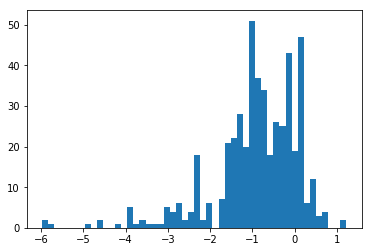

In [219]:
plt.hist(pred_means, bins=50)

In [220]:
max(pred_uncs)

0.15015169735484957

In [286]:
def discretize_predictive_distribution(pred_means, pred_uncs, expt_mean, expt_unc, num_grid=1000):
    # to set bounds for a grid representation, let's look at 1stdev +/- the mean of each prediction?
    lefts = pred_means - 8 * pred_uncs
    rights = pred_means + 8 * pred_uncs

    expt_left = expt_mean - 6 * expt_unc
    expt_right = expt_mean + 6 * expt_unc

    x_min = min(expt_left, np.min(lefts))
    x_max = max(expt_right, np.max(rights))
    x_grid = np.linspace(x_min, x_max, num_grid)

    y_tot = np.zeros(x_grid.shape)
    n_components = len(pred_means)
    for i in range(n_components):    
        y = norm.pdf(x_grid, loc=pred_means[i], scale=pred_uncs[i])
        y_tot += y

    Z = np.trapz(y_tot, x_grid)
    y_tot /= Z
    
    return x_grid, y_tot

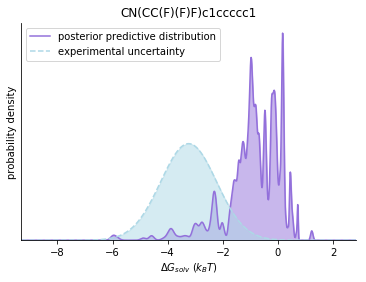

In [289]:
def plot_predictive_distribution(ax, pred_means, pred_uncs, expt_mean, expt_unc, show_legend=True):
    x_grid, y_tot = discretize_predictive_distribution(pred_means, pred_uncs, expt_mean, expt_unc)

    pred_color = 'mediumpurple'
    expt_color = 'lightblue'

    
    plt.plot(x_grid,y_tot, color=pred_color, label='posterior predictive distribution')
    plt.fill_between(x_grid, y_tot, color=pred_color ,alpha=0.5)

    plt.xlabel(r'$\Delta G_{solv}$ $(k_B T)$')
    plt.ylabel('probability density')

    plt.yticks([])
    remove_top_right_spines(ax)

    # okay! and now let's compare that with the experimental mean and uncertainty

    y_expt = norm.pdf(x_grid, loc=expt_mean, scale=expt_unc)

    plt.plot(x_grid,y_expt, color=expt_color, linestyle='--',label='experimental uncertainty')
    plt.fill_between(x_grid, y_expt, color=expt_color,alpha=0.5)
    if show_legend:
        plt.legend()
    plt.title(test_mols[ind].smiles)

    plt.ylim(0,)
    
    plt.xlim(x_grid[0], x_grid[-1])

ax = plt.subplot(1,1,1)
pred_means, pred_uncs = np.array(y_test)[burn_in:, ind], np.array(y_unc_test)[burn_in:,ind]
expt_mean, expt_unc = experiment_test[ind], experiment_unc_test[ind]
plot_predictive_distribution(ax, pred_means, pred_uncs, expt_mean, expt_unc)
plt.savefig('posterior-predictive-distribution-example.png', dpi=300)

In [258]:
from scipy.stats import entropy
entropy(y_tot, y_expt, base=2)

4.203316167127559

In [259]:
ind = 1
x_grid, y_tot = discretize_predictive_distribution(ind=ind)
y_expt = norm.pdf(x_grid, loc=experiment_test[ind], scale=experiment_unc_test[ind])

Text(0.5, 0, '$\\Delta G_{solv}$ $(k_B T)$')

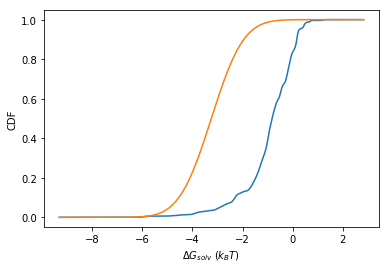

In [260]:
plt.plot(x_grid, np.cumsum(y_tot) / np.sum(y_tot))
plt.plot(x_grid, np.cumsum(y_expt) / np.sum(y_expt))
plt.ylabel('CDF')
plt.xlabel(r'$\Delta G_{solv}$ $(k_B T)$')

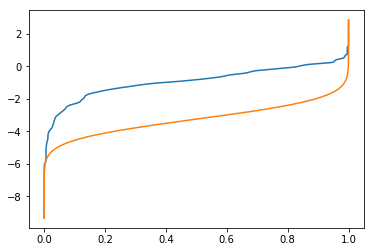

In [262]:
plt.plot(np.cumsum(y_tot) / np.sum(y_tot), x_grid)
plt.plot(np.cumsum(y_expt) / np.sum(y_expt), x_grid)

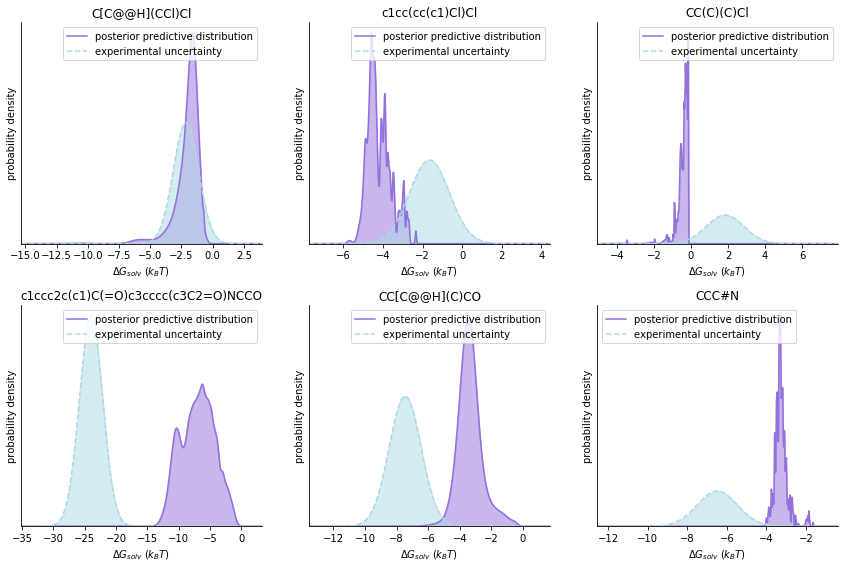

In [300]:
plt.figure(figsize=(12,8))

for i in range(6):
    ax = plt.subplot(2,3,i + 1)
    ind = i + 5
    pred_means, pred_uncs = np.array(y_test)[burn_in:, ind], np.array(y_unc_test)[burn_in:,ind]
    expt_mean, expt_unc = experiment_test[ind], experiment_unc_test[ind]
    plot_predictive_distribution(ax, pred_means, pred_uncs, expt_mean, expt_unc)
    if i == 5:
        plt.legend(loc='upper left')
    
plt.tight_layout()

plt.savefig('some_example_posterior_predictive_distributions.png', dpi=300)

In [ ]:
# hmm, I feel like the right thing to do is integrate something with respect to both
# the posterior predictive distribution and the distribution of experimental uncertainty...

In [160]:
preds.shape

(413, 161)

In [138]:
np.trapz(np.mean(interval_masses, 0), ps)

0.23878386413527708

In [ ]:
def coverage(preds, actual, actual_uncertainty, prob=0.99):
    percentile = prob * 100
    
    eps = (100.0 - percentile) / 2
    lb, ub = np.percentile(preds, q=[eps, 100.0 - eps], axis=0)
    return np.mean((actual >= lb) * (actual <= ub))

In [105]:
for t in traj:
    t.update_node_order()

In [106]:
change_points = []
for i in range(len(traj) - 1):
    if traj[i].ordered_nodes != traj[i + 1].ordered_nodes:
        change_points.append(i)

In [107]:
len(traj) - change_points[-1]

233

In [108]:
time_spent_in_each_model = [change_points[i+1] - change_points[i] for i in range(len(change_points) - 1)]

(array([239.,  87.,  36.,  16.,   8.,   3.,   2.,   0.,   0.,   1.]),
 array([1.0000e+00, 1.1560e+02, 2.3020e+02, 3.4480e+02, 4.5940e+02,
        5.7400e+02, 6.8860e+02, 8.0320e+02, 9.1780e+02, 1.0324e+03,
        1.1470e+03]),
 <a list of 10 Patch objects>)

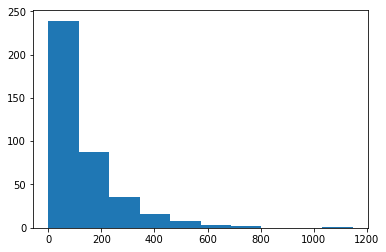

In [109]:
plt.hist(time_spent_in_each_model)

In [110]:
min(time_spent_in_each_model), max(time_spent_in_each_model)

(1, 1147)

In [112]:
longest_sampled_model_ind = np.argmax(time_spent_in_each_model)

In [263]:
traj[change_points[longest_sampled_model_ind + 1]]

*                                             (r = 0.073 nm)
|-[#1]                                        (r = 0.188 nm)
|-[#6]                                        (r = 0.156 nm)
  |-[#6&H0]                                   (r = 0.205 nm)
    |-[#6&H0]~[H2]                            (r = 0.227 nm)
      |-[#6&H0]@[H2]                          (r = 0.113 nm)
        |-[#6&H0]~[A]@[H2]                    (r = 0.096 nm)
          |-[#6&H0]~[A]@[H2&r3]               (r = 0.206 nm)
          |-[#6&H0]=[A]@[H2]                  (r = 0.131 nm)
            |-[#6&H0]=[A]~[A]@[H2]            (r = 0.100 nm)
              |-[#6&H0]~[+0]=[A]~[A]@[H2]     (r = 0.333 nm)
              |-[#6&H0]=[A]~[A&X4]@[H2]       (r = 0.278 nm)
          |-[#6&H0]~[H2]~[A]@[H2]             (r = 0.378 nm)
            |-[#6&H0]~[H2]~[A&H2]@[H2]        (r = 0.313 nm)
        |-[#6&H0]~[H0]@[H2]                   (r = 0.323 nm)
          |-[#6&H0]-[H0]@[H2]                 (r = 0.302 nm)
          |-[#6&H0]~[H0]

In [123]:
i_dict = dict(zip(t_s, range(len(t_s))))

In [114]:
all_mols = train_mols + test_mols

In [115]:
from bayes_implicit_solvent.typers import FlatGBTyper
all_typer = FlatGBTyper(all_types)
matches = [all_typer.get_matches(m.mol) for m in all_mols]

In [116]:
hits = sum([m.sum(0) for m in matches])

In [117]:
count_dict = dict(zip(all_typer.smarts_list, hits))
size_dict = dict(zip(all_typer.smarts_list, 0.1 + np.log2(hits)))

In [118]:
size_dict

{'*': 13.60444659914958,
 '[#15]': 4.006890595608518,
 '[#15]~[#6]': 0.1,
 '[#15]~[H1]': 0.1,
 '[#15]~[X4]': 0.1,
 '[#16&+2]': 0.1,
 '[#16&-1]': 0.1,
 '[#16&H1]': 2.1,
 '[#16&H2]': 0.1,
 '[#16&X3]': 1.1,
 '[#16&X3]~[#6]': 0.1,
 '[#16&X3]~[X4]': 0.1,
 '[#16&X4&r5]': 0.1,
 '[#16&X4]': 2.684962500721156,
 '[#16&X4]~[#17]': 0.1,
 '[#16&X4]~[a]': 0.1,
 '[#16&a]': 1.1,
 '[#16]': 5.800439718141091,
 '[#16]~[#16]': 2.1,
 '[#16]~[#16]~[H2]': 1.1,
 '[#16]~[#7]': 0.1,
 '[#16]~[#8]': 3.1,
 '[#16]~[r7]': 0.1,
 '[#17]': 8.357387842692651,
 '[#17]~[#16]': 0.1,
 '[#17]~[H1]': 5.054196310386875,
 '[#17]~[H3]': 0.1,
 '[#17]~[X3]': 7.772425341971495,
 '[#17]~[X4]': 6.772425341971495,
 '[#17]~[r0]': 6.714709844115208,
 '[#1]': 12.655787402083773,
 '[#1]~[X3]': 10.543979542601253,
 '[#1]~[a]': 10.26867211813223,
 '[#1]~[r4]': 3.1,
 '[#1]~[r7]': 4.9579809951275715,
 '[#35]': 5.006890595608518,
 '[#35]~[A]~[X3]': 0.1,
 '[#35]~[H1]': 2.684962500721156,
 '[#35]~[H1]~[#35]': 1.6849625007211562,
 '[#35]~[H2]': 3

In [264]:
# now, let's also make predictions for just the continuous parameters sampled in one model...


sub_traj = traj[change_points[longest_sampled_model_ind ] + 1:change_points[longest_sampled_model_ind + 1]]

In [267]:
assert(np.array([sub_traj[i].ordered_nodes == sub_traj[i+1].ordered_nodes for i in range(len(sub_traj) - 1)]).all())

In [268]:
len(sub_traj)

1146

In [269]:
change_points[longest_sampled_model_ind]

38369

In [270]:
sub_traj[0].number_of_nodes

106

In [272]:
sub_traj_test_predictions = []
i_s = range(len(sub_traj))[::5]
for i in tqdm(i_s):
    tree = sub_traj[i]
    sub_traj_test_predictions.append(get_test_predictions(tree))


100%|██████████| 230/230 [04:26<00:00,  1.16s/it]


In [277]:
sub_traj_test_pred_mean = [[p[0] for p in pred] for pred in sub_traj_test_predictions]
sub_traj_test_pred_unc = [[p[1] for p in pred] for pred in sub_traj_test_predictions]

In [292]:
sub_traj_test_pred_mean = np.array(sub_traj_test_pred_mean)
sub_traj_test_pred_unc = np.array(sub_traj_test_pred_unc)

(array([52.,  0.,  0.,  0.,  0.,  0.,  8., 95., 34., 41.]),
 array([-5.98196317, -5.43840529, -4.89484741, -4.35128953, -3.80773165,
        -3.26417377, -2.72061588, -2.177058  , -1.63350012, -1.08994224,
        -0.54638436]),
 <a list of 10 Patch objects>)

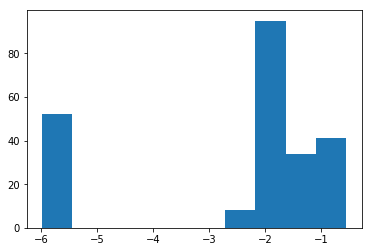

In [293]:
plt.hist(sub_traj_test_pred_mean[:,ind])

In [294]:
ind

1

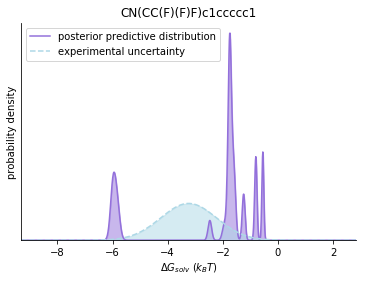

In [296]:
ax = plt.subplot(1,1,1)
pred_means, pred_uncs = sub_traj_test_pred_mean[:, ind], sub_traj_test_pred_unc[:,ind]
expt_mean, expt_unc = experiment_test[ind], experiment_unc_test[ind]
plot_predictive_distribution(ax, pred_means, pred_uncs, expt_mean, expt_unc)
plt.savefig('continuous_posterior-predictive-distribution-example.png', dpi=300)

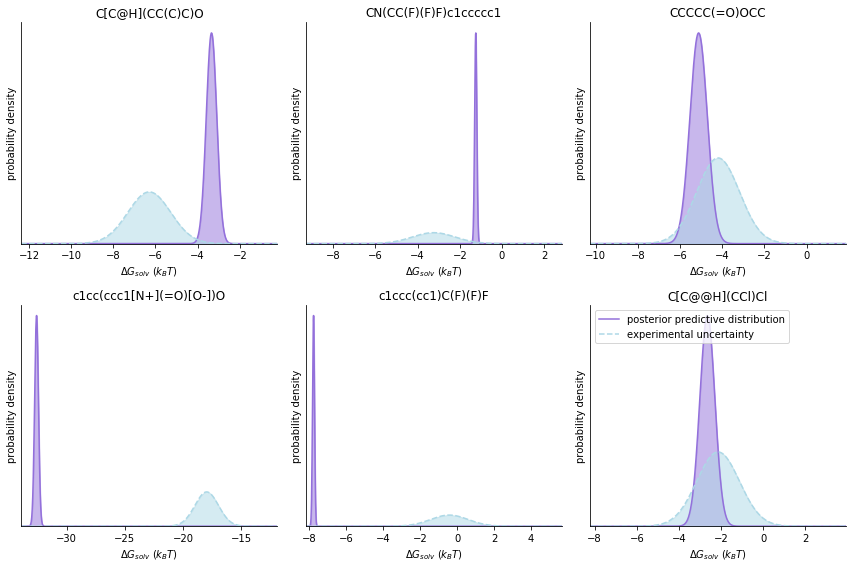

In [298]:
t = 1

plt.figure(figsize=(12,8))

for ind in range(6):
    ax = plt.subplot(2,3,ind + 1)
    pred_means, pred_uncs = sub_traj_test_pred_mean[:t, ind], sub_traj_test_pred_unc[:t,ind]
    expt_mean, expt_unc = experiment_test[ind], experiment_unc_test[ind]
    plot_predictive_distribution(ax, pred_means, pred_uncs, expt_mean, expt_unc, show_legend=False)
    #plot_predictive_distribution(ax, ind=ind, burn_in=10, show_legend=False)
    if ind == 5:
        plt.legend(loc='upper left')
    
plt.tight_layout()

plt.savefig('some_example_posterior_predictive_distributions_continuous.png', dpi=300)

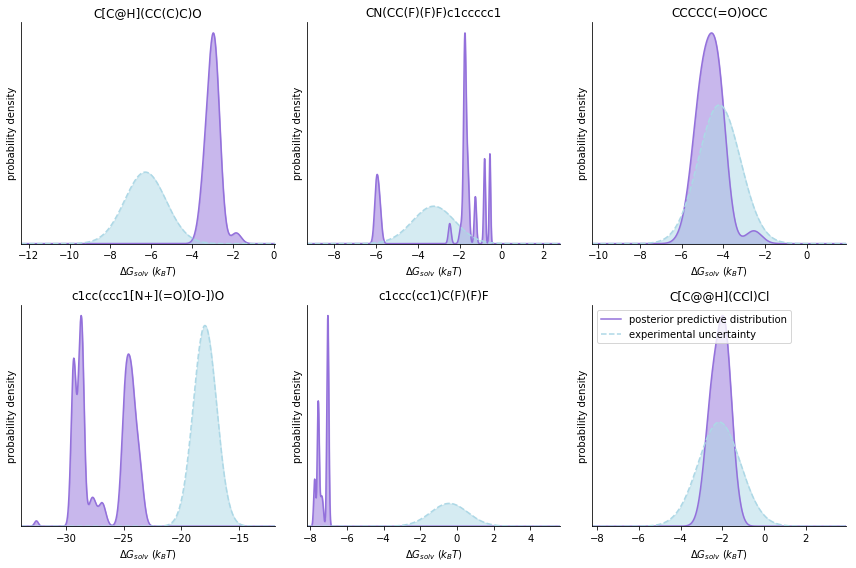

In [297]:
plt.figure(figsize=(12,8))

for ind in range(6):
    ax = plt.subplot(2,3,ind + 1)
    pred_means, pred_uncs = sub_traj_test_pred_mean[:, ind], sub_traj_test_pred_unc[:,ind]
    expt_mean, expt_unc = experiment_test[ind], experiment_unc_test[ind]
    plot_predictive_distribution(ax, pred_means, pred_uncs, expt_mean, expt_unc, show_legend=False)
    #plot_predictive_distribution(ax, ind=ind, burn_in=10, show_legend=False)
    if ind == 5:
        plt.legend(loc='upper left')
    
plt.tight_layout()

plt.savefig('some_example_posterior_predictive_distributions_continuous.png', dpi=300)

In [ ]:
# TODO: Animation of the posterior predictive distributions changing as we include more samples...

In [ ]:
# 0: 1 = 4! / (4 - 0)!
# 1: 4 = 4! / (4 - 1)!
# 2: 4 * 3 = 4! / (4 - 2)!
# 3: 4 * 3 * 2 = 4! / (4 - 3)!
# 4: 4 * 3 * 2 * 1 = 4!